<a href="https://colab.research.google.com/github/yuliapin/naivebayes-HeartFailurePredictionDataset/blob/main/TugasAI_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# load dataset
dataset = pd.read_csv('heart.csv')

In [ ]:
# menampilkan informasi dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# preprocessing data
# encode fitur kategorikal
le = LabelEncoder()

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])

In [18]:
# memisahkan fitur dan target
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [19]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
# feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
# train dengan model naive bayes
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [22]:
# prediksi
y_pred = classifier.predict(x_test)

In [23]:
# evaluasi
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[62 15]
 [13 94]]
Accuracy: 0.8478260869565217


<ipython-input-28-82f9a7524827>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 3],


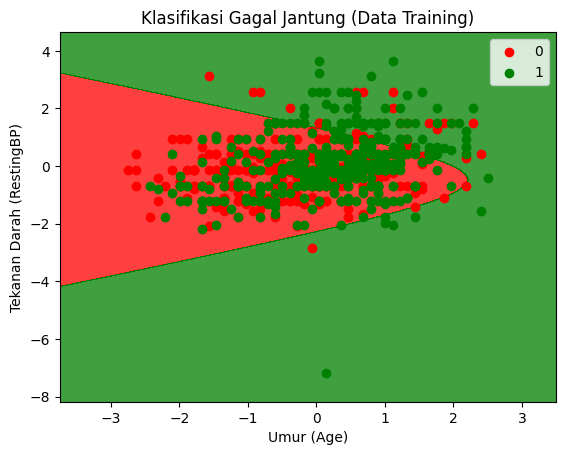

<ipython-input-28-82f9a7524827>:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 3],


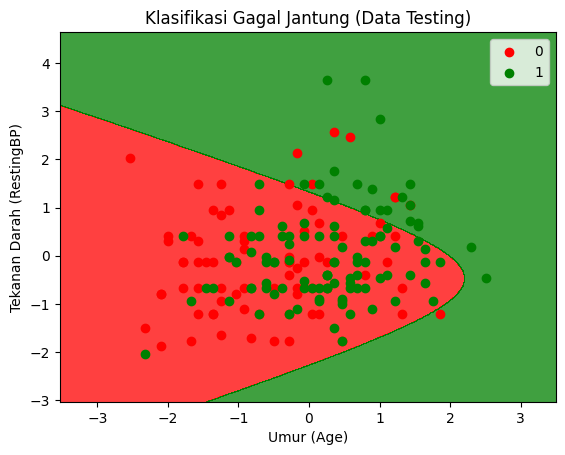

In [28]:
# visualisasi hasil (umur dengan RestingBP)
def visualize_results(x_set, y_set, title):
    # Hanya gunakan Umur dan RestingBP
    x1_min, x1_max = x_set[:, 0].min() - 1, x_set[:, 0].max() + 1
    x2_min, x2_max = x_set[:, 3].min() - 1, x_set[:, 3].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))

    # Buat dummy array dengan semua fitur (11), tapi isikan hanya umur dan RestingBP
    dummy = np.zeros((xx1.ravel().shape[0], x_train.shape[1]))
    dummy[:, 0] = xx1.ravel()
    dummy[:, 3] = xx2.ravel()

    Z = classifier.predict(dummy).reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 3],
                    c=ListedColormap(('red', 'green'))(i), label=j)

    plt.title(title)
    plt.xlabel('Umur (Age)')
    plt.ylabel('Tekanan Darah (RestingBP)')
    plt.legend()
    plt.show()

visualize_results(x_train, y_train, 'Klasifikasi Gagal Jantung (Data Training)')
visualize_results(x_test, y_test, 'Klasifikasi Gagal Jantung (Data Testing)')